# Banking Marketing Campaign

### Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

### Objective: create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [1]:
import logging # crea una bitacora de incidencias de nuestro script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import ( train_test_split, GridSearchCV ) 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import ( MinMaxScaler, LabelEncoder ) 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ( 
        accuracy_score, 
        f1_score, 
        matthews_corrcoef, 
        classification_report, 
        ConfusionMatrixDisplay ) 
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
logger = logging.getLogger()
logger.setLevel(logging.INFO) 

### **1. Data loading** **Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
# https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv

url = ('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv')
df_raw = pd.read_csv(url, sep=';')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df_raw.sample(10, random_state=2025)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4479,58,retired,married,basic.4y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
24230,51,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8307,43,admin.,married,high.school,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4824,31,admin.,married,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
12201,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no
20123,36,housemaid,married,basic.6y,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
11995,44,admin.,married,university.degree,unknown,yes,yes,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,no
9514,45,admin.,married,university.degree,no,yes,no,telephone,jun,mon,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20217,48,entrepreneur,married,university.degree,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
8739,22,services,single,high.school,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


In [6]:
num_rows, num_cols = df_raw.shape
print(f"El data set tiene {num_rows} filas y {num_cols} columnas.")

El data set tiene 41188 filas y 21 columnas.


### **2. Data preprocessing** **Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [4]:
df_baking = df_raw.copy()

df = df_baking.copy()

### **3. Exploratory Data Analysis** **Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2025, stratify=df['y'])
print("Primeras filas de df_train:")
print(df_train.head())

Primeras filas de df_train:
       age          job  marital            education  default housing loan  \
15671   35   technician  married  professional.course       no      no  yes   
16411   30   technician  married             basic.9y       no     yes   no   
13394   27  blue-collar   single             basic.4y       no     yes   no   
11584   59      retired  married             basic.4y  unknown      no  yes   
6263    34  blue-collar  married             basic.9y       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
15671   cellular   jul         mon  ...         2    999         0   
16411   cellular   jul         wed  ...         1    999         0   
13394   cellular   jul         wed  ...         5    999         0   
11584  telephone   jun         fri  ...         3    999         0   
6263   telephone   may         tue  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \

In [9]:
print("\nForma de df_train:", df_train.shape)


Forma de df_train: (32950, 21)



Estadísticas descriptivas de las variables numéricas:
                age      duration      campaign         pdays      previous  \
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000   
mean      40.024097    258.879909      2.557269    962.867436      0.169378   
std       10.412035    259.011247      2.769918    185.942153      0.489152   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    103.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4199.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  32950.000000    32950.000000   32950.000000  32950.000000  32950.000000  
mean       0.077159       93.573272     -40.518501      3.616255   5166

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.024097,10.412035,17.000,32.000,38.000,47.000,98.000
duration,32950.0,258.879909,259.011247,0.000,103.000,180.000,320.000,4199.000
campaign,32950.0,2.557269,2.769918,1.000,1.000,2.000,3.000,56.000
pdays,32950.0,962.867436,185.942153,0.000,999.000,999.000,999.000,999.000
previous,32950.0,0.169378,0.489152,0.000,0.000,0.000,0.000,7.000
emp.var.rate,32950.0,0.077159,1.572547,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,32950.0,93.573272,0.579627,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,32950.0,-40.518501,4.632317,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,32950.0,3.616255,1.735786,0.634,1.344,4.857,4.961,5.045
nr.employed,32950.0,5166.924395,72.284270,4963.600,5099.100,5191.000,5228.100,5228.100


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,8406,19931,9766,26085,17268,27203,21007,10961,6850,28527,29238



Distribución de la variable objetivo 'y':
y
no     29238
yes     3712
Name: count, dtype: int64


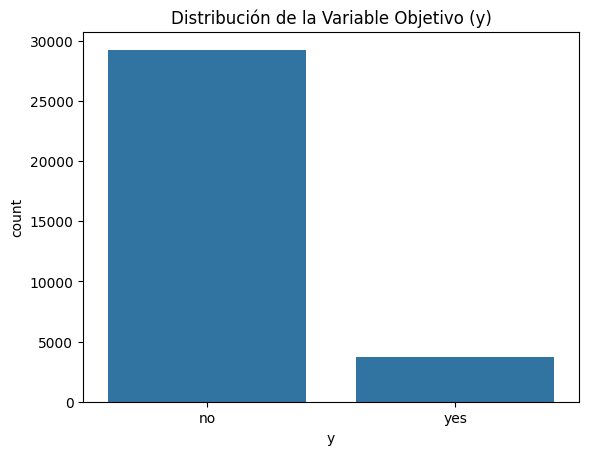

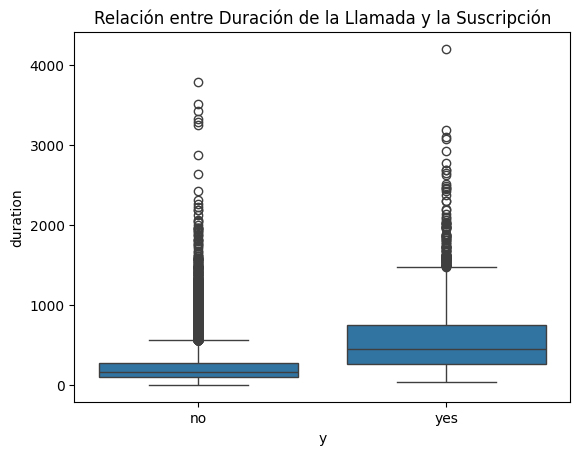

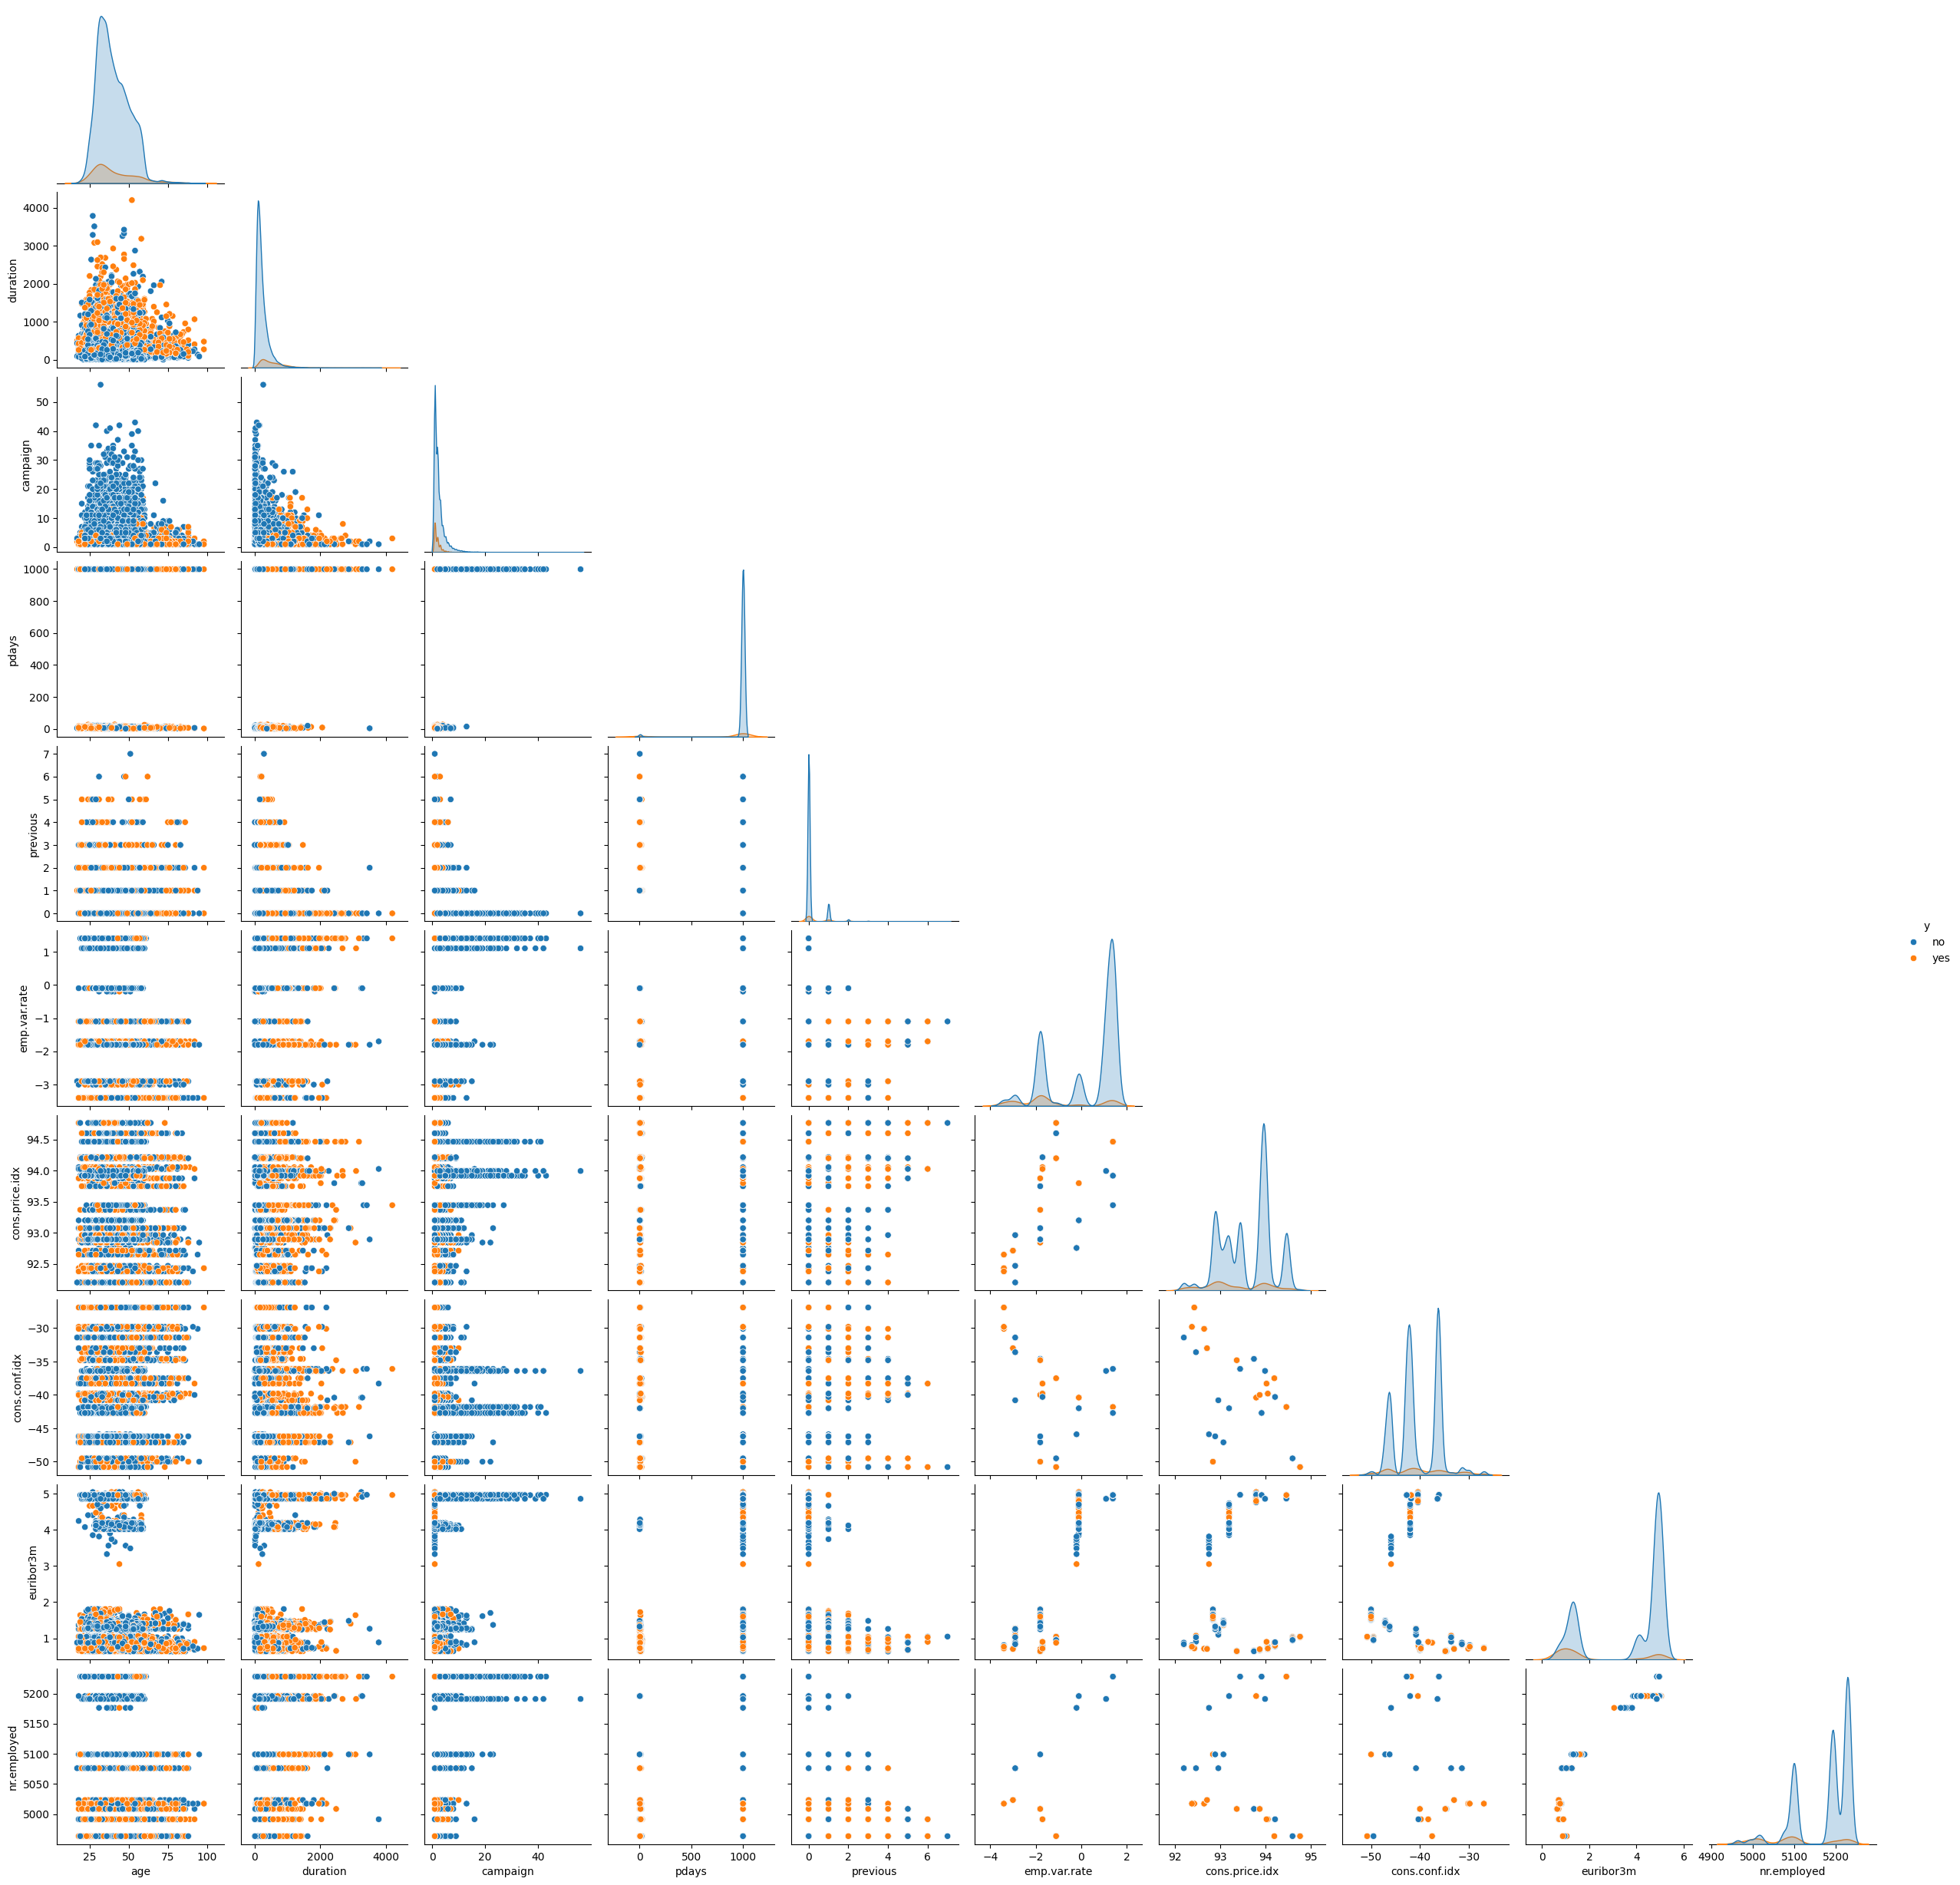

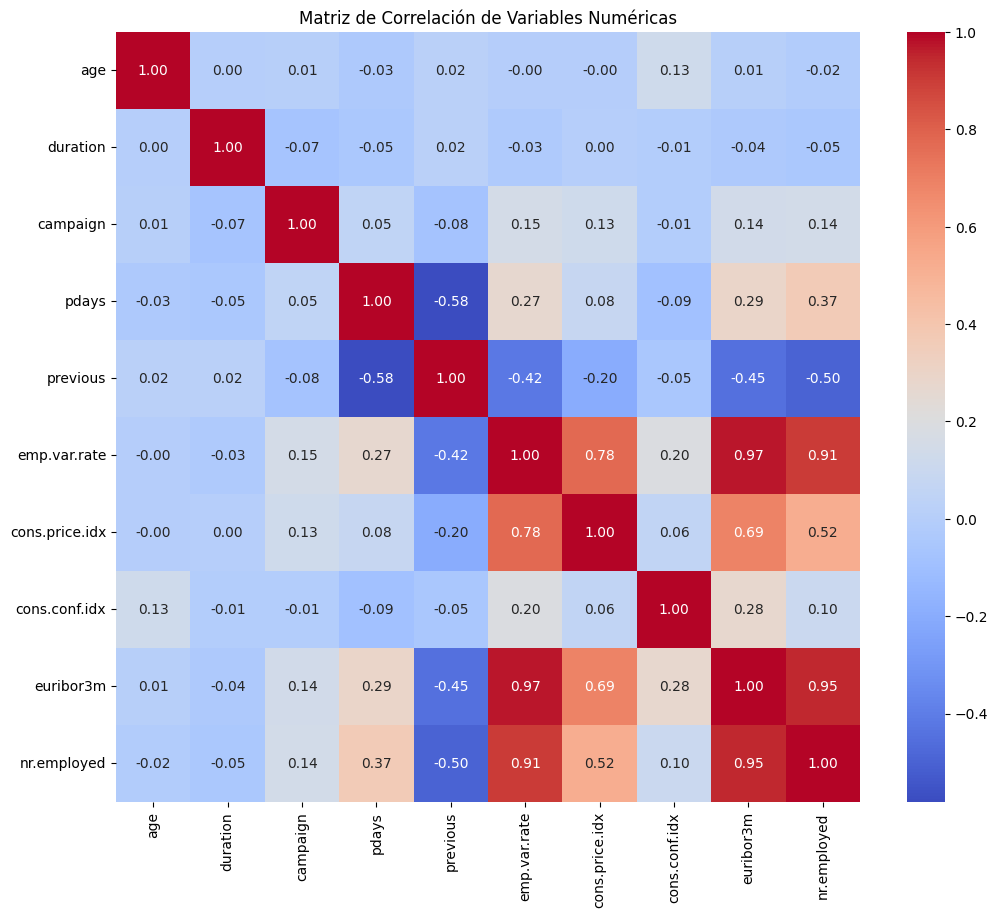

In [6]:
# a. Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_train.describe())
display(df_train.describe(include='number').T)
# a.1 Estadísticas descriptivas de las variables categórias
display(df_train.describe(include='object'))

# b. Distribución de la variable objetivo 'y'
print("\nDistribución de la variable objetivo 'y':")
print(df_train['y'].value_counts())
sns.countplot(x='y', data=df_train)
plt.title('Distribución de la Variable Objetivo (y)')
plt.show()

# c. Relación entre variables numéricas y la variable objetivo (ejemplo con 'duration')
sns.boxplot(x='y', y='duration', data=df_train)
plt.title('Relación entre Duración de la Llamada y la Suscripción')
plt.show()

# d. Análsis Bivariado
sns.pairplot(data = df_train, hue= 'y', corner=True) # cruza dos variables, la dependiente con cada numerica
plt.show()

# e. Matriz de correlación de las variables numéricas
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_train[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [7]:
# a. Identificar variables predictoras (X_train, X_test) y la variable objetivo (y_train, y_test)
X_train = df_train.drop('y', axis=1)
y_train = df_train['y']
X_test = df_test.drop('y', axis=1)
y_test = df_test['y']

# b. Identificar columnas categóricas y numéricas (basado en el conjunto de entrenamiento)
categorical_features = X_train.select_dtypes(include='object').columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# c. Crear transformadores para variables numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# d. Crear un preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [9]:
# e. Aplicar el preprocesador 
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convertir los resultados procesados a DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_processed_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

In [10]:
# --- Entrenamiento del Modelo de Regresión Logística ---
print("\n--- Entrenamiento del Modelo de Regresión Logística ---")

# a. Definir el modelo
logistic_model = LogisticRegression(solver='liblinear', random_state=2025)

# b. Crear el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_model)])

# c. Entrenar el modelo
pipeline.fit(X_train, y_train)


--- Entrenamiento del Modelo de Regresión Logística ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(random_state=2025, solver='liblinear'))])


--- Evaluación del Modelo ---

Informe de Clasificación:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.67      0.41      0.51       928

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Matriz de Confusión:


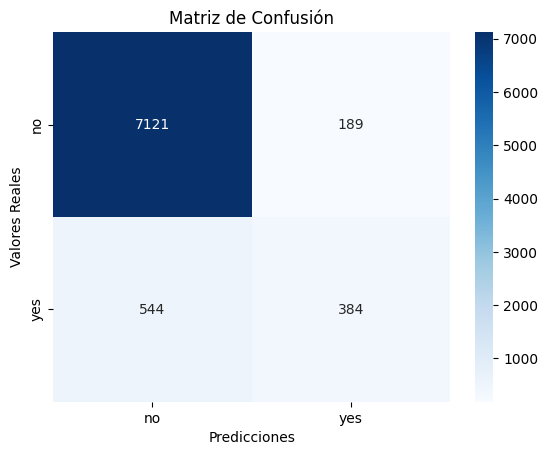


Precisión del Modelo: 0.9110220927409566


In [11]:
# --- Evaluación del Modelo ---
print("\n--- Evaluación del Modelo ---")

# a. Realizar predicciones en el conjunto de prueba
y_hat = pipeline.predict(X_test)

# b. Evaluar el modelo
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_hat))

print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nPrecisión del Modelo:", accuracy_score(y_test, y_hat))

## Optimize the previous model

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 2. Codificar la variable objetivo 'y' a numérica
label_encoder = LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])

# 3. Dividir los datos
X = df.drop(['y', 'y_encoded'], axis=1)
y = df['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025, stratify=y)

# 4. Identificar columnas categóricas y numéricas
categorical_features = X_train.select_dtypes(include='object').columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# 5. Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# 6. Definir el modelo y el pipeline
logreg = LogisticRegression(random_state=2025, solver='liblinear')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logreg)])

# 7. Definir el espacio de hiperparámetros
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': [None, 'balanced']
}

# 8. Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# 9. Obtener los mejores hiperparámetros y el mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 10. Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print("\nInforme de Clasificación del Mejor Modelo:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)) # Mostrar nombres originales

Mejores hiperparámetros: {'classifier__C': 0.001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}

Informe de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

          no       0.98      0.83      0.90      7310
         yes       0.39      0.88      0.54       928

    accuracy                           0.83      8238
   macro avg       0.69      0.86      0.72      8238
weighted avg       0.92      0.83      0.86      8238

